In [569]:
import pandas as pd

In [570]:
data = pd.read_csv(r'train.csv')
data

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [571]:
data.isnull().any()

id         False
gravity    False
ph         False
osmo       False
cond       False
urea       False
calc       False
target     False
dtype: bool

In [572]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = [x for x in data.columns]
columns

['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']

Feature Engineering

In [573]:
# POLYNOMIAL

# Squared

data['calc_sq'] = data['calc']**2
data['cond_sq'] = data['cond']**2
data['gravity_sq'] = data['gravity']**2
data['osmo_sq']  = data['osmo']**2
data['urea_sq'] = data['urea']**2
data['ph_sq']  = data['ph']**2

# multiples
data['calc_1.5'] = data['calc']* 1.5
data['cond_1.5'] = data['cond']* 1.5
data['gravity_1.5'] = data['gravity']* 1.5
data['osmo_1.5']  = data['osmo']* 1.5
data['urea_1.5'] = data['urea']* 1.5
data['ph_1.5']  = data['ph']* 1.5

data['calc_.5'] = data['calc']* 0.5
data['cond_.5'] = data['cond']* 0.5
data['gravity_.5'] = data['gravity']* 0.5
data['osmo_.5']  = data['osmo']* 0.5
data['urea_.5'] = data['urea']* 0.5
data['ph_.5']  = data['ph']* 0.5


In [574]:
columns = [x for x in data.columns]
columns.remove('id')
columns.remove('target')
len(columns)


24

<Figure size 800x1800 with 0 Axes>

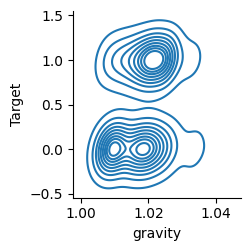

<Figure size 800x1800 with 0 Axes>

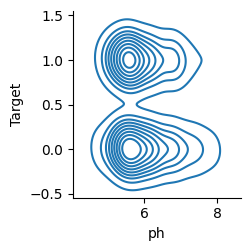

<Figure size 800x1800 with 0 Axes>

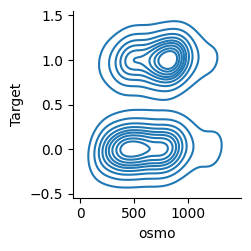

<Figure size 800x1800 with 0 Axes>

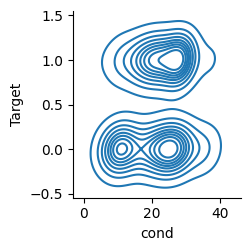

<Figure size 800x1800 with 0 Axes>

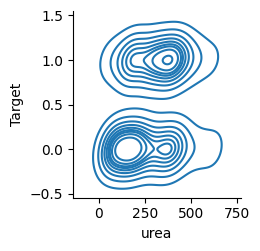

<Figure size 800x1800 with 0 Axes>

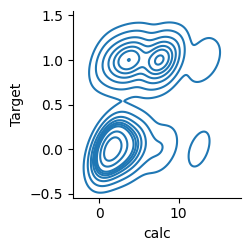

<Figure size 800x1800 with 0 Axes>

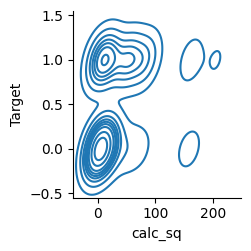

<Figure size 800x1800 with 0 Axes>

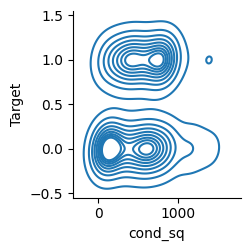

<Figure size 800x1800 with 0 Axes>

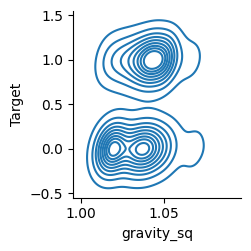

<Figure size 800x1800 with 0 Axes>

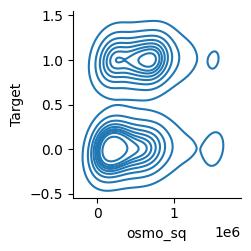

<Figure size 800x1800 with 0 Axes>

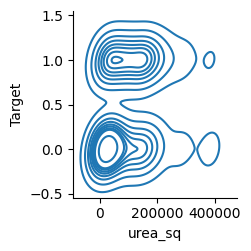

<Figure size 800x1800 with 0 Axes>

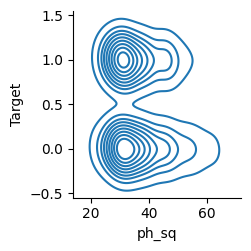

<Figure size 800x1800 with 0 Axes>

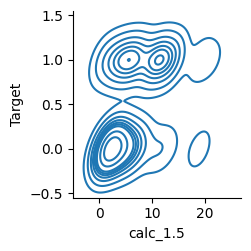

<Figure size 800x1800 with 0 Axes>

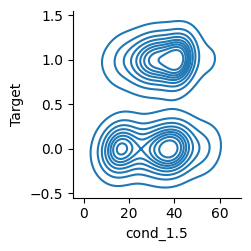

<Figure size 800x1800 with 0 Axes>

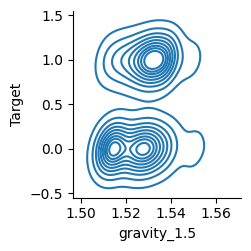

<Figure size 800x1800 with 0 Axes>

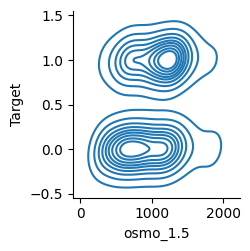

<Figure size 800x1800 with 0 Axes>

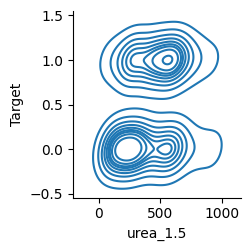

<Figure size 800x1800 with 0 Axes>

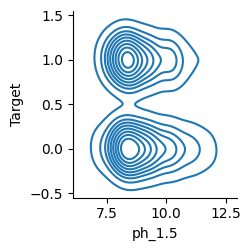

<Figure size 800x1800 with 0 Axes>

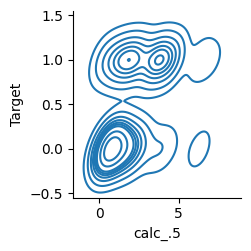

<Figure size 800x1800 with 0 Axes>

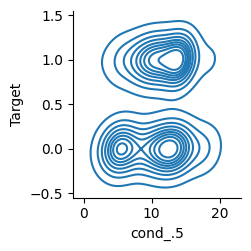

<Figure size 800x1800 with 0 Axes>

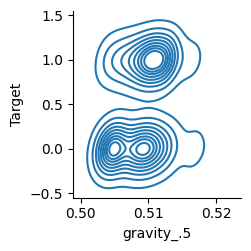

<Figure size 800x1800 with 0 Axes>

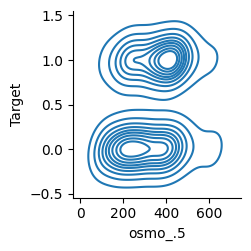

<Figure size 800x1800 with 0 Axes>

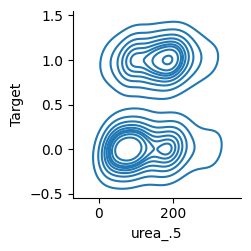

<Figure size 800x1800 with 0 Axes>

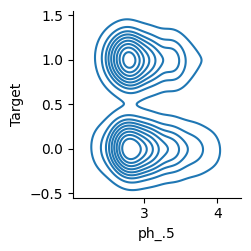

In [575]:
i = 0
for i in range(len(columns)):
    plt.figure(figsize=(8,18))
    sns.pairplot(data,x_vars=f'{columns[i]}',y_vars='target',kind='kde')
    plt.xlabel(f'{columns[i]}')
    plt.ylabel('Target')
    plt.show()
    i += 1

In [576]:
from lofo import LOFOImportance , Dataset , plot_importance

In [577]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
model1 = LogisticRegression(n_jobs=5,solver='liblinear',penalty='l1',max_iter=800 , multi_class= 'auto',C=0.8)

model2 = KNeighborsClassifier(n_jobs=5)

  0%|          | 0/24 [00:00<?, ?it/s]

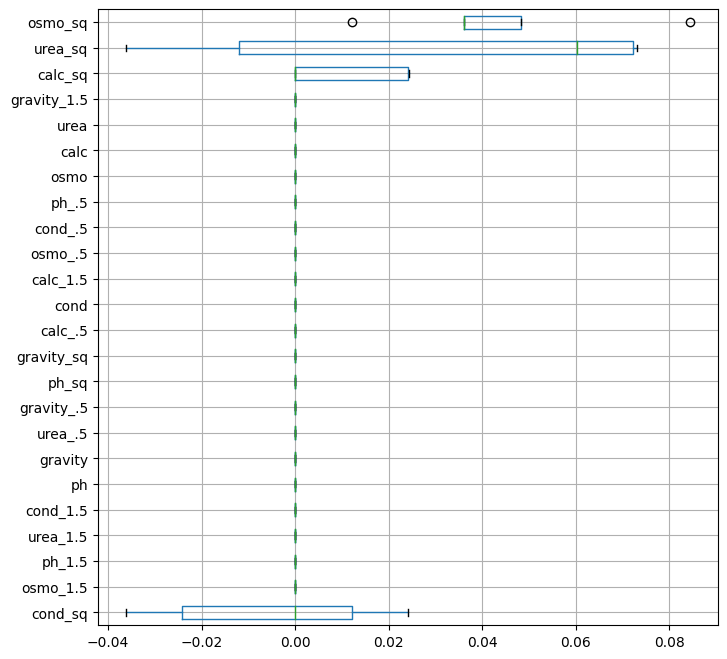

In [578]:
cv = KFold()
dataset = Dataset(data,target='target',features=columns)
lofo_imp = LOFOImportance(dataset,cv = cv,scoring='neg_mean_absolute_error',model = model2)
importance_lofo = lofo_imp.get_importance()
plot_importance(importance_lofo,kind='box')

In [579]:
len(columns)

24

In [580]:
while len(columns) > 0 : columns.pop()
columns.append('osmo_sq')
columns.append('urea_sq')
#columns

In [581]:
X = data[columns]
y = data['target']

In [582]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)

In [583]:
model2.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=5)

In [584]:
pred = model2.predict(X_test)
print('mean squared error is : ' , mean_squared_error(y_test,pred))

mean squared error is :  0.4879518072289157


In [585]:
a_pred = model2.predict(X_train)
print('mean squared error is : ' ,mean_squared_error(y_train,a_pred))

mean squared error is :  0.3170731707317073


Submission

In [586]:
sub_data = pd.read_csv('test.csv')

In [587]:
# POLYNOMIAL

# Squared

sub_data['calc_sq'] = sub_data['calc']**2
sub_data['cond_sq'] = sub_data['cond']**2
sub_data['gravity_sq'] = sub_data['gravity']**2
sub_data['osmo_sq']  = sub_data['osmo']**2
sub_data['urea_sq'] = sub_data['urea']**2
sub_data['ph_sq']  = sub_data['ph']**2

# multiples
sub_data['calc_1.5'] = sub_data['calc']* 1.5
sub_data['cond_1.5'] = sub_data['cond']* 1.5
sub_data['gravity_1.5'] = sub_data['gravity']* 1.5
sub_data['osmo_1.5']  = sub_data['osmo']* 1.5
sub_data['urea_1.5'] = sub_data['urea']* 1.5
sub_data['ph_1.5']  = sub_data['ph']* 1.5

sub_data['calc_.5'] = sub_data['calc']* 0.5
sub_data['cond_.5'] = sub_data['cond']* 0.5
sub_data['gravity_.5'] = sub_data['gravity']* 0.5
sub_data['osmo_.5']  = sub_data['osmo']* 0.5
sub_data['urea_.5'] = sub_data['urea']* 0.5
sub_data['ph_.5']  = sub_data['ph']* 0.5

In [588]:
s_columns = [x for x in sub_data.columns]
s_columns.remove('id')

while len(s_columns) > 0 : s_columns.pop()

s_columns.append('calc_sq')

In [589]:
sub_pred = model.predict(sub_data[s_columns])
len(sub_pred)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- calc
- calc_.5
- calc_1.5
- cond
- cond_.5
- ...


In [ ]:
sub_file = pd.DataFrame()
sub_file['id'] = sub_data['id']
sub_file['target'] = sub_pred
sub_file

,id,target
0,414,0
1,415,0
2,416,1
3,417,0
4,418,0
...,...,...
271,685,1
272,686,0
273,687,0
274,688,0


In [ ]:
#sub_file.to_csv('Sub7.csv',index=False)